## Final Project Submission


* Student name: Miriam Semmar
* Student pace: online part time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL: https://miriamsemmar.github.io/the_movie_database_api


# Ask

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. 

Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. 

You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# Exploring the Available Data

## Package Import

In [4]:
# importing all packages we intend to leverage

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

## Determining What Data is Available

In [5]:
#Importing files provided.

files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

## Organizing Files

In [7]:
#Isolating the primary key and creating a list of the other columns within each file. 

primary_keys = []
other_columns = []

for file in files:
    try:
        primary_keys.append(pd.read_csv(file).columns[0])
        other_columns.append(list(pd.read_csv(file).columns[1:]))
    except:
        primary_keys.append(pd.read_csv(file,sep='\t',encoding='latin1').columns[0])
        other_columns.append(list(pd.read_csv(file,sep='\t',encoding='latin1').columns[1:]))

In [13]:
#Then, using these lists to create a dataframe for easy reference.
#Creating a dictionary from the above lists

data = {'File':files,'Primary Key':primary_keys,'Other Columns':other_columns}

# Creating the dataframe and ensuring we can view all values in the "Other Columns"

files_df = pd.DataFrame(data).sort_values('File')
pd.set_option('display.max_colwidth',1000)
files_df.reset_index(drop=True,inplace=True)
files_df

,File,Primary Key,Other Columns
0,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
1,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
3,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
4,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
5,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
6,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
8,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
9,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


## File Summary


In [36]:
files_df

,File,Primary Key,Other Columns
0,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
1,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
3,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
4,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
5,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
6,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
8,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
9,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


Starting with the Movie Budgets table (File 10) as cost information is readily available and tied to movie titles. Financial insight will be crucial to making relevant business decisions.

Notes on other files (referencing index in files_df):

- File 0: Gross information but tied grouped by studios. Also missing budget information, so we can't calculate profit from this table alone.

- Files 1, 4 and 5: Not interested in individual employees information this early on.  

- Files 2 and 3: Helpful movie information but prefer to start looking at information tied to budgets.

- Files 6 and 8: Could be interesting to determine if there's a correlation with popularity and rating, but not a priority. 

- Files 7 and 9: Very helpful information but does not contain budget information or, in the case of File 7, title information. May merge this with File 10 at a later time. 

# Question 1: What is the state of profits in the movie industry?

## Formatting/Initial Inspection of Data

In [37]:
#Importing movie budgets table as a dataframe. 
#Converting money strings to integers, replacing dollar signs in all money columns.

Money = pd.read_csv(files[8])
Money['production_budget'] = Money['production_budget'].str.replace('$','').str.replace(',','').astype(int)
Money['domestic_gross'] = Money['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
Money['worldwide_gross'] = Money['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [38]:
#Adding profit column

Money['total_profit'] = Money['worldwide_gross'] - Money['production_budget']
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [39]:
#Checking for any null values. None.

Money.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
total_profit         False
dtype: bool

In [40]:
#Checking for any missing data

Money.loc[(Money['worldwide_gross'] == 0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,-90000000
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,-75000000
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,-12000
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000


In [42]:
#Excluding movies where grossing data is not yet available (6% of all data). 
#Assuming that this data is either not yet available or missing.
#Creating new dataframe.

Grossing_movies = Money.loc[(Money['worldwide_gross'] > 0)]
Grossing_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [43]:
# Adding release year column to more easily group profits. 

Grossing_movies['release_year'] = pd.DatetimeIndex(Grossing_movies['release_date']).year
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [47]:
#Quick view of summary stats. 
#Notice that movies released starting in 1915 through 2019 are included here
#Average profit for all time is $64,379,990.03

Grossing_movies.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07,6.437999e+07,2003.599446
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08,1.498581e+08,12.546965
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,1915.000000
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06,-1.862082e+06,1999.000000
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07,1.190000e+07,2006.000000
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08,6.737924e+07,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,2019.000000


## Profit by Decade

In [48]:
# Creating decades column for grouping

Grossing_movies['decade'] = (10 * (Grossing_movies['release_year'] // 10))
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010


In [49]:
Grossing_movies.sort_values('total_profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997,1990
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,2010
...,...,...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005,2002,2000
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,2001,2000
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,2019,2010
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,2011,2010


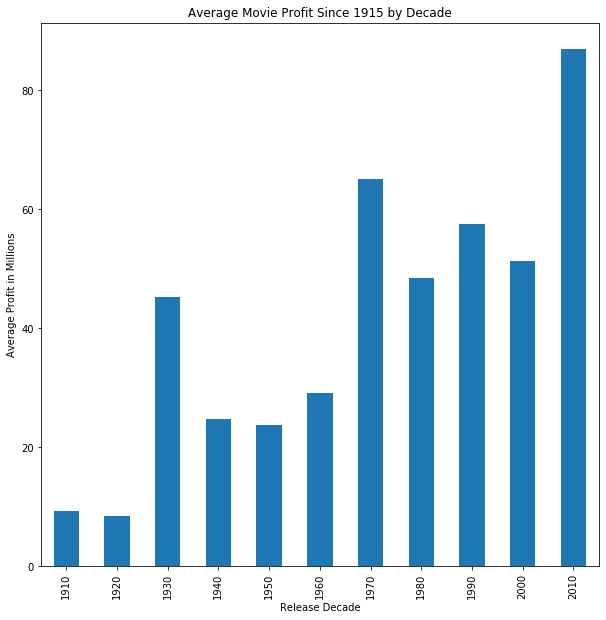

In [50]:
#Plotting average profit over time using plotly

Profit_over_time = (Grossing_movies.groupby(['decade'])['total_profit'].mean())/1000000
Profit_over_time

Profit_over_time.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Decade')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 1915 by Decade')
plt.ticklabel_format(style='plain', axis='y') #prevent scientific notation (no longer necessary since we're dividing the mean by millions)

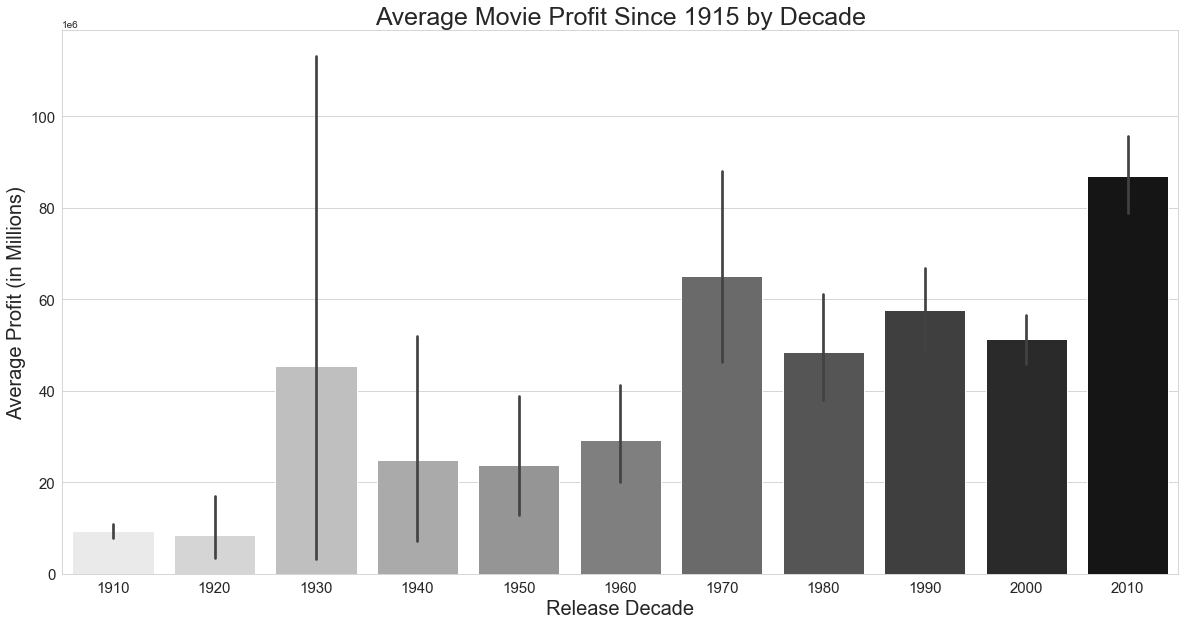

In [51]:
#Plotting average profit over time using seaborn

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=Grossing_movies,x='decade',y='total_profit',palette='gray_r')
sns.set(font="Helvetica")
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Movie Profit Since 1915 by Decade',fontsize=25)
plt.xlabel('Release Decade',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()



#reverse color map help: https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbar

The movie industry has become increasingly profitable since the 1910s

## Profit in the Last Decade

In [53]:
#Creating new dataframe. Let's look at profit in the last decade so that our analysis is more relevant.

Last_decade_gross = Grossing_movies.loc[Grossing_movies['decade']==2010]
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010


Text(0.5, 1.0, 'Average Movie Profit Since 2010 by Year')

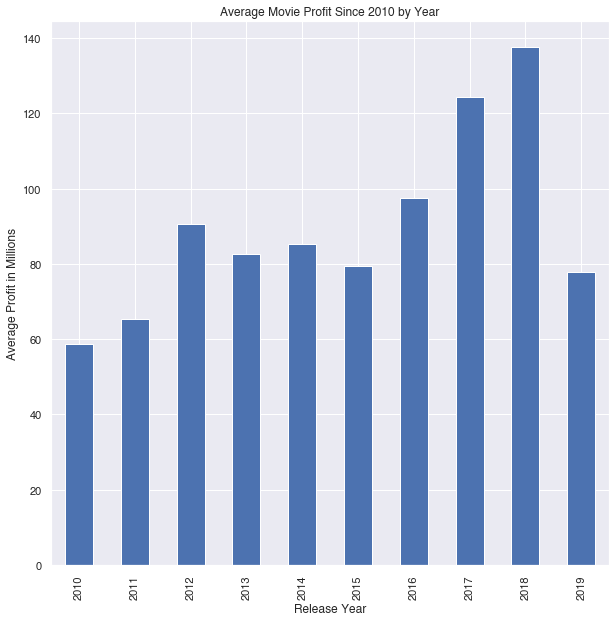

In [55]:
#Plotting average profit over time using plotly

Last_decade_gross_group = (Last_decade_gross.groupby(['release_year'])['total_profit'].mean())/1000000
Last_decade_gross_group.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Year')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 2010 by Year')

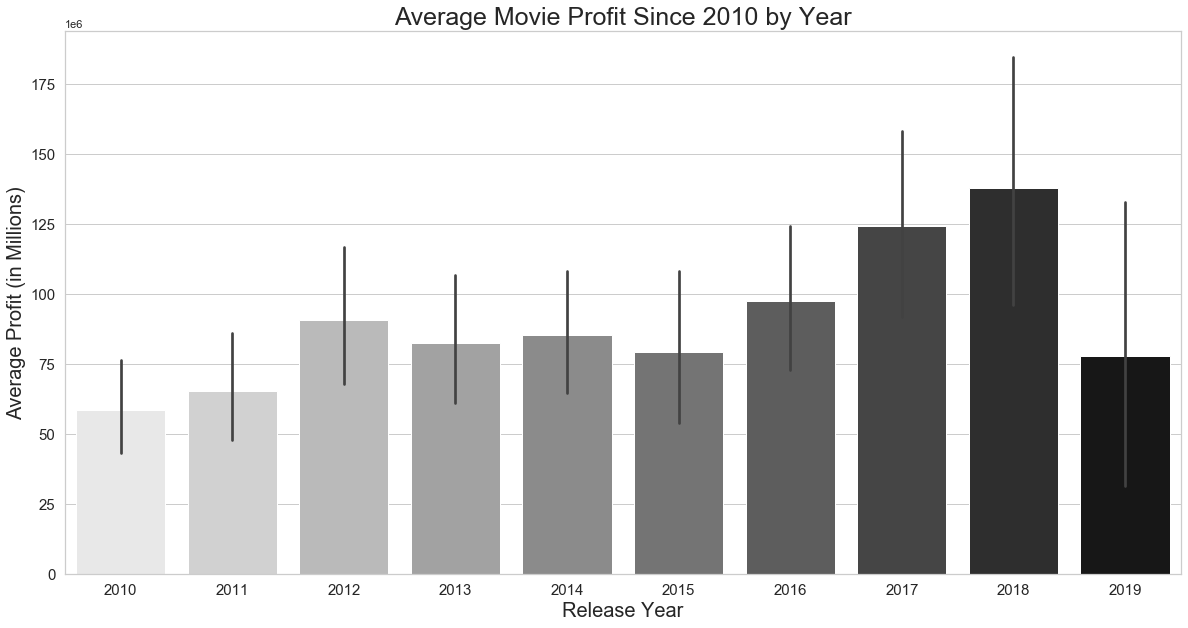

In [56]:
#Plotting average profit over time using seaborn

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=Last_decade_gross,x='release_year',y='total_profit',palette='gray_r')
sns.set(font="Helvetica")
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Movie Profit Since 2010 by Year',fontsize=25)
plt.xlabel('Release Year',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()

In [57]:
#Investigating why 2019 may have dipped. Sample size for 2019 is smaller than other years.

Last_decade_gross['release_year'].value_counts()

2010    258
2015    242
2011    241
2013    212
2014    207
2012    207
2016    204
2017    162
2018    140
2019     49
Name: release_year, dtype: int64

In [58]:
#Checking if 2019 movies had more movies with profit loss, contributing to the lower average.

(Last_decade_gross['release_year'][Last_decade_gross['total_profit'] < 0].value_counts())/(Last_decade_gross['release_year'].value_counts())

2010    0.341085
2011    0.331950
2012    0.270531
2013    0.292453
2014    0.338164
2015    0.404959
2016    0.279412
2017    0.240741
2018    0.242857
2019    0.306122
Name: release_year, dtype: float64

Potential Reasons for decrease in 2019:

- Limited sample size, especially compared to the other years
- "Cord cutters" are a growing group of consumers, giving rise to more direct to streaming movies and people skipping the box office. This data does not include data around views/profits from these platforms (i.e, Netflix,Hulu,Amazon Prime Video, etc)

# Gathering Additional Information

## TMDB API and TMDB Simple Package import

In [61]:
#Using the movie names provided to search the movie database API
#More info: https://developers.themoviedb.org/3/movies/get-movie-details
#Leveraging the tmdbsimple package to more easily call this information
#More info: https://pypi.org/project/tmdbsimple/

In [60]:
pip install tmdbsimple

Note: you may need to restart the kernel to use updated packages.


In [62]:
import tmdbsimple as tmdb
tmdb.API_KEY = 'dad396248d0ec2a32944e1a50e0e4781'

## Mapping Movie Titles to IDs in TMDB

In [66]:
#Checking for duplicate rows
Last_decade_gross[Last_decade_gross.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade


In [67]:
#Checking for duplicate names.  

Last_decade_gross['movie'].value_counts()

The Square                     2
Robin Hood                     2
Florence Foster Jenkins        1
Les Intouchables               1
Don't Be Afraid of the Dark    1
                              ..
The Shape of Water             1
The Frozen Ground              1
White House Down               1
Survivor                       1
Miss Sloane                    1
Name: movie, Length: 1920, dtype: int64

In [68]:
#Duplicate names are differentiated by release year.  

Last_decade_gross[Last_decade_gross['movie']=='The Square']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
5009,10,"Apr 9, 2010",The Square,1900000,406216,740932,-1159068,2010,2010
5099,100,"Oct 25, 2013",The Square,1500000,124244,176262,-1323738,2013,2010


In [69]:
Last_decade_gross[Last_decade_gross['movie']=='Robin Hood']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,2010,2010
408,9,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,-14252559,2018,2010


In [70]:
#Considered using the ID column, but the ID column is not unique.

[Last_decade_gross['id'].value_counts()]

[51    27
 81    27
 52    26
 39    26
 54    25
       ..
 30    13
 89    13
 5     13
 65    13
 87    12
 Name: id, Length: 100, dtype: int64]

In [64]:
#Note that we're working with 1922 different movies.

Last_decade_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010
...,...,...,...,...,...,...,...,...,...
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010
5744,45,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010


In [71]:
# Create unique identifier using movie and release year

Last_decade_gross['unique'] = Last_decade_gross["release_year"].astype(str) + "," + Last_decade_gross["movie"]

Last_decade_gross

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens"
...,...,...,...,...,...,...,...,...,...,...
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace"
5744,45,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,"2017,Emily"
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,"2015,Exeter"
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards"


In [72]:
#Creating a list of unique titles and release years to loop through. 

movie_unique = list(Last_decade_gross['unique'])

In [73]:
#Checking how we can separate years and titles for each item in list

movie_unique[0][0:4]

'2011'

In [74]:
movie_unique[0][5:]

'Pirates of the Caribbean: On Stranger Tides'

In [76]:
#Looping through our list of unique movie names to search tmdb to find the movie IDs
#Creating an empty list to fill the ids with. If error, we'll fill the ID with 'Missing' for now.
#Creating an empty list to separate the titles missing ids
#Taking the first result from the search as it is most likely the most relevant(best match first). 
##No exact match option available.
#Including a print items so that we can track progress of this loop.

search = tmdb.Search()
tmdb_ids = []
errors = []
items = 0


for movie in movie_unique:
    items += 1
    print(items)
    yr = (movie[0:4])
    name = (movie[5:])
    try:
        response = search.movie(query = name,year=yr)
        tmdb_ids.append(search.results[0]['id'])
    except: 
        tmdb_ids.append('Missing')
        errors.append(movie)
    if items == len(movie_unique):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922


In [77]:
#Checking that our list of ids matches the number of movies from Last_decade_gross. 

len(tmdb_ids)

1922

In [99]:
#Adding TMDB IDs to our df. 
#Filtering to see 'Missing rows'

Last_decade_gross['tmdb_ids'] = tmdb_ids
Last_decade_gross[Last_decade_gross['tmdb_ids'] == 'Missing']

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",Missing
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",Missing
175,76,"May 10, 2019",PokÃ©mon: Detective Pikachu,150000000,139507806,411258433,261258433,2019,2010,"2019,PokÃ©mon: Detective Pikachu",Missing
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,2010,"2011,Harry Potter and the Deathly Hallows: Part II",Missing
279,80,"Dec 21, 2016",Assassinâs Creed,125000000,54647948,240759682,115759682,2016,2010,"2016,Assassinâs Creed",Missing
...,...,...,...,...,...,...,...,...,...,...,...
5701,2,"Jul 17, 2015",Dawn of the Crescent Moon,75000,8799,8799,-66201,2015,2010,"2015,Dawn of the Crescent Moon",Missing
5710,11,"Jan 25, 2013",Supporting Characters,60000,4917,4917,-55083,2013,2010,"2013,Supporting Characters",Missing
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace",Missing
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards",Missing


In [78]:
#How many errors were there?

len(errors)

123

In [79]:
#Many errors being caused due to special characters

errors

['2017,Star Wars Ep. VIII: The Last Jedi',
 '2015,Star Wars Ep. VII: The Force Awakens',
 '2019,PokÃ©mon: Detective Pikachu',
 '2011,Harry Potter and the Deathly Hallows: Part II',
 '2016,Assassinâ\x80\x99s Creed',
 '2016,The Huntsman: Winterâ\x80\x99s War',
 '2016,Miss Peregrineâ\x80\x99s Home for Peculiar Children',
 '2012,Jin lÃ\xadng shÃ\xad san chai',
 '2018,Spider-Man: Into The Spider-Verse 3D',
 '2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©',
 '2019,Renegades',
 '2018,Dr. Seussâ\x80\x99 The Grinch',
 '2018,Oceanâ\x80\x99s 8',
 '2017,Daddyâ\x80\x99s Home 2',
 '2014,Legends of Oz: Dorothyâ\x80\x99s Return',
 "2012,Doctor Seuss' The Lorax",
 '2016,Peteâ\x80\x99s Dragon',
 '2019,A Dogâ\x80\x99s Way Home',
 '2014,Winterâ\x80\x99s Tale',
 "2011,Mr. Poppers's Penguins",
 '2015,Daddyâ\x80\x99s Home',
 '2018,The Girl in the Spiderâ\x80\x99s Web',
 "2015,Pourquoi j'ai pas mangÃ© mon pÃ¨re",
 '2016,Billy Lynnâ\x80\x99s Long Halftime Walk',
 '2016,Yip Man 3',
 '2017,Queen of the Dese

In [80]:
#Manually determined the special characters and the replacements needed. Input them in a list.

replacements = [('Ã©','é'),
                ("\x80\x80\x99","'"),
                ("â\x80\x99","'"),
                 ('Ãª','ê'),
                 ('â\x80¦','...'),
                 ('â\x80\x99'','''),
                 ('Ã¡','á'),
                 ('Ã¨','è'),
                 ('Ã','à'),
                 ('Âº','º'),
                 ('\\',"'"),
                 ('à¸','ø'),
                 ('à§','ç'),
                 ('Ep.','Episode'),
                 ('à³','ó'),
                 ('à¹','ù'),
                 ('2Â½','2½'),
                 ('à¤','ä'),
                 ('à¬','ì'),
                 ('à»','û'),
                 ('à\\x','í'),
                 ('à«','ë'),
                 ('â\x80\x93','-'),
                 ('à¥','å'),
                 ('Part II','Part 2') ]

In [81]:
#Create a formula to clean the movie titles in list of errors. 

def clean_movie(data):
        for a in replacements:
            data = data.replace(a[0], a[1])
        return data

In [83]:
#Test formula

print(errors[2][5:])
print(clean_movie(errors[2][5:]))

PokÃ©mon: Detective Pikachu
Pokémon: Detective Pikachu


In [85]:
#Creating an empty list to add the clean names to.
#Creating an empty list to add the original names to (to use later to map our replacements).

errors_replacements = []
errors_replacements_unique = []

for movie in errors:
    errors_replacements.append(clean_movie(movie[5:]))
    errors_replacements_unique.append(movie)

In [86]:
errors_replacements

['Star Wars Episode VIII: The Last Jedi',
 'Star Wars Episode VII: The Force Awakens',
 'Pokémon: Detective Pikachu',
 'Harry Potter and the Deathly Hallows: Part 2',
 "Assassin's Creed",
 "The Huntsman: Winter's War",
 "Miss Peregrine's Home for Peculiar Children",
 'Jin là\xadng shà\xad san chai',
 'Spider-Man: Into The Spider-Verse 3D',
 'Astérix et Obélix: Au service de Sa Majesté',
 'Renegades',
 "Dr. Seuss' The Grinch",
 "Ocean's 8",
 "Daddy's Home 2",
 "Legends of Oz: Dorothy's Return",
 "Doctor Seuss' The Lorax",
 "Pete's Dragon",
 "A Dog's Way Home",
 "Winter's Tale",
 "Mr. Poppers's Penguins",
 "Daddy's Home",
 "The Girl in the Spider's Web",
 "Pourquoi j'ai pas mangé mon père",
 "Billy Lynn's Long Halftime Walk",
 'Yip Man 3',
 'Queen of the Desert',
 "Bridget Jones's Baby",
 "Isn't it Romantic",
 "The Hitman's Bodyguard",
 "Molly's Game",
 'Grace of Monaco',
 'Savva. Serdtse voyna',
 "Rules Don't Apply",
 "New Year's Eve",
 "A Dog's Purpose",
 "Mother's Day",
 'Yi ge ren de

In [88]:
#Creating a dataframe to map the original and fixed names. 

errors_dict = {'unique':errors_replacements_unique,'fixed':errors_replacements}
errors_df = pd.DataFrame(errors_dict)
errors_df

,unique,fixed
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2
4,"2016,Assassinâs Creed",Assassin's Creed
...,...,...
118,"2015,Dawn of the Crescent Moon",Dawn of the Crescent Moon
119,"2013,Supporting Characters",Supporting Characters
120,"2010,Down Terrace",Down Terrace
121,"2010,Breaking Upwards",Breaking Upwards


In [89]:
#Looping through the corrected names to try to find the IDs again

search = tmdb.Search()
fixed_ids = []
errors_after_name_update = []
items = 0


for movie in errors_df['fixed']:
    items += 1
    print(items)
    try:
        response = search.movie(query = movie)
        fixed_ids.append(search.results[0]['id'])
    except: 
        fixed_ids.append('Missing')
        errors_after_name_update.append(movie)
    if items == len(errors_df['fixed']):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [91]:
len(fixed_ids) == len(errors_df['fixed'])

True

In [92]:
#Adding the ids to the dataframe

errors_df['fixed_ids'] = fixed_ids
errors_df

,unique,fixed,fixed_ids
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi,181808
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens,140607
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu,447404
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2,12445
4,"2016,Assassinâs Creed",Assassin's Creed,121856
...,...,...,...
118,"2015,Dawn of the Crescent Moon",Dawn of the Crescent Moon,326576
119,"2013,Supporting Characters",Supporting Characters,139998
120,"2010,Down Terrace",Down Terrace,42151
121,"2010,Breaking Upwards",Breaking Upwards,44990


In [93]:
#Reduced Missing values to 13. Dropping these (<1% of Last_decade_gross)

errors_df[errors_df['fixed_ids']=='Missing'].shape

(13, 3)

In [94]:
errors_df[errors_df['fixed_ids']=='Missing']

,unique,fixed,fixed_ids
7,"2012,Jin lÃ­ng shÃ­ san chai",Jin là­ng shà­ san chai,Missing
8,"2018,Spider-Man: Into The Spider-Verse 3D",Spider-Man: Into The Spider-Verse 3D,Missing
15,"2012,Doctor Seuss' The Lorax",Doctor Seuss' The Lorax,Missing
19,"2011,Mr. Poppers's Penguins",Mr. Poppers's Penguins,Missing
31,"2016,Savva. Serdtse voyna",Savva. Serdtse voyna,Missing
38,"2017,ChÄi dÃ n zhuÄnjiÄ",ChÄi dà n zhuÄnjiÄ,Missing
42,"2017,JÃ¬yÃ¬ dÃ shÄ«",Jìyì dà shÄ«,Missing
51,"2010,San suk si gin",San suk si gin,Missing
57,"2015,San cheng ji",San cheng ji,Missing
62,"2019,PMC: deo beong-keo",PMC: deo beong-keo,Missing


In [95]:
#Creatings new df where the missing data is not included

no_missing = errors_df[errors_df['fixed_ids']!='Missing']
no_missing = no_missing.reset_index(drop=True)
no_missing.head()

,unique,fixed,fixed_ids
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi,181808
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens,140607
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu,447404
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2,12445
4,"2016,Assassinâs Creed",Assassin's Creed,121856


In [ ]:
#Replace items from errors into Last Decade 

In [97]:
#Dictionary with IDs

found_tmdb = dict(zip(errors_df['unique'],errors_df['fixed_ids']))
len(found_tmdb)
found_tmdb

{'2017,Star Wars Ep. VIII: The Last Jedi': 181808,
 '2015,Star Wars Ep. VII: The Force Awakens': 140607,
 '2019,PokÃ©mon: Detective Pikachu': 447404,
 '2011,Harry Potter and the Deathly Hallows: Part II': 12445,
 '2016,Assassinâ\x80\x99s Creed': 121856,
 '2016,The Huntsman: Winterâ\x80\x99s War': 290595,
 '2016,Miss Peregrineâ\x80\x99s Home for Peculiar Children': 283366,
 '2012,Jin lÃ\xadng shÃ\xad san chai': 'Missing',
 '2018,Spider-Man: Into The Spider-Verse 3D': 'Missing',
 '2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©': 99770,
 '2019,Renegades': 335788,
 '2018,Dr. Seussâ\x80\x99 The Grinch': 570602,
 '2018,Oceanâ\x80\x99s 8': 402900,
 '2017,Daddyâ\x80\x99s Home 2': 419680,
 '2014,Legends of Oz: Dorothyâ\x80\x99s Return': 59981,
 "2012,Doctor Seuss' The Lorax": 'Missing',
 '2016,Peteâ\x80\x99s Dragon': 294272,
 '2019,A Dogâ\x80\x99s Way Home': 508763,
 '2014,Winterâ\x80\x99s Tale': 137321,
 "2011,Mr. Poppers's Penguins": 'Missing',
 '2015,Daddyâ\x80\x99s Home': 274167,
 '201

In [100]:
#Checking that the number of 'Missing' rows matches the length of errors. 

len(Last_decade_gross['tmdb_ids'][Last_decade_gross["tmdb_ids"]=='Missing'])

123

In [102]:
Last_decade_gross[Last_decade_gross["tmdb_ids"]=='Missing']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",Missing
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",Missing
175,76,"May 10, 2019",PokÃ©mon: Detective Pikachu,150000000,139507806,411258433,261258433,2019,2010,"2019,PokÃ©mon: Detective Pikachu",Missing
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,2010,"2011,Harry Potter and the Deathly Hallows: Part II",Missing
279,80,"Dec 21, 2016",Assassinâs Creed,125000000,54647948,240759682,115759682,2016,2010,"2016,Assassinâs Creed",Missing
...,...,...,...,...,...,...,...,...,...,...,...
5701,2,"Jul 17, 2015",Dawn of the Crescent Moon,75000,8799,8799,-66201,2015,2010,"2015,Dawn of the Crescent Moon",Missing
5710,11,"Jan 25, 2013",Supporting Characters,60000,4917,4917,-55083,2013,2010,"2013,Supporting Characters",Missing
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace",Missing
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards",Missing


In [103]:
#Where Last_decade_gross tmdb_ids is missing, map our found tmdb ids based based on our unique name columns

Last_decade_gross["tmdb_ids"][Last_decade_gross["tmdb_ids"]=='Missing'] =  Last_decade_gross["unique"].map(found_tmdb)


/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [104]:
Last_decade_gross['movie'][Last_decade_gross["tmdb_ids"]=='Missing']

405                  Jin lÃ­ng shÃ­ san chai
443     Spider-Man: Into The Spider-Verse 3D
762                  Doctor Seuss' The Lorax
1008                  Mr. Poppers's Penguins
2008                    Savva. Serdtse voyna
2398                   ChÄi dÃ n zhuÄnjiÄ
2694                          JÃ¬yÃ¬ dÃ shÄ«
3158                          San suk si gin
3449                            San cheng ji
3531                      PMC: deo beong-keo
4461                          Airlift (2016)
5497    Siakh lokhamim: ha'slilim ha'gnouzim
5659              Antarctic Edge: 70Âº South
Name: movie, dtype: object

In [105]:
#Dropping 13 missing

Last_decade_gross = Last_decade_gross[Last_decade_gross["tmdb_ids"]!='Missing']

In [106]:
#Checking for null values

Last_decade_gross.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
total_profit         0
release_year         0
decade               0
unique               0
tmdb_ids             0
dtype: int64

In [107]:
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides",1865
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix",320288
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron",99861
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",181808
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",140607


In [108]:
#Dropping id and unique columns. No longer needed. 

Last_decade_gross.drop(['id','unique'],axis=1,inplace=True)

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
#Reset index for clarity

Last_decade_gross.reset_index(drop=True)
Last_decade_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607
...,...,...,...,...,...,...,...,...,...
5740,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,42151
5744,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,446397
5748,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,226458
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990


## Using IDs to find Genres and Ratings

In [ ]:
#Tests to determine example outputs

In [112]:
#Genres. Response will return multiple genres + IDs.

movie = tmdb.Movies(1865)
response = movie.info()
response = response['genres']
response

[{'id': 12, 'name': 'Adventure'},
 {'id': 28, 'name': 'Action'},
 {'id': 14, 'name': 'Fantasy'}]

In [113]:
#Ratings. Need to filter to US ratings only. Will print multiple ratings. Occasionally duplicates.

response = movie.releases()
movie.countries
for c in movie.countries:
    if c['iso_3166_1'] == 'US':
        print((c['certification']))

PG-13
PG-13


In [110]:
#Looping through our tmdb_ids to search tmdb to find the movie IDs
#Creating empty lists to fill the genres and ratings with.
#Taking all genres.
#Taking all of the results fromr ratings, but ensuring that we're only adding unqiue values per movie.
##No exact match option available.
#Including a print items so that we can track progress of this loop.

count = 0

genre_names = []
ratings_list = []

for m in Last_decade_gross['tmdb_ids']:
    
    count += 1
    print(count)
    
    #genres
    movie_genre = []
    movie = tmdb.Movies(m)
    response = movie.info()
    response = response['genres']
    for g in response:
        movie_genre.append(g['name'])
    genre_names.append(movie_genre)
    
    #ratings
    grouped_ratings = []
    response = movie.releases()
    movie.countries
    for c in movie.countries:
        if c['iso_3166_1'] == 'US':
            grouped_ratings.append((c['certification']))
    unique = sorted(set(grouped_ratings))
    unique = [x for x in unique if len(x.strip()) > 0]
    if len(unique) == 0:
        unique.append('Not Rated')
    ratings_list.append(unique)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909


In [114]:
#Making sure each list has 1909 items

print(len(genre_names))

1909


In [115]:
print(len(ratings_list))

1909


In [116]:
#Adding values to dataframes as new columns

Last_decade_gross['Genres'] = genre_names
Last_decade_gross['Ratings'] = ratings_list

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [118]:
Last_decade_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",[PG-13]
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",[PG-13]
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",[PG-13]
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808,"[Science Fiction, Action, Adventure]",[PG-13]
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,"[Action, Adventure, Science Fiction, Fantasy]",[PG-13]


## Cleaning Ratings Data

In [119]:
#Checking what unique values we have

unique_ratings = [] 
for x in Last_decade_gross.Ratings:
    if x not in unique_ratings: 
            unique_ratings.append(x)
unique_ratings

[['PG-13'],
 ['PG'],
 ['PG-13', 'R'],
 ['G'],
 ['R'],
 ['Not Rated'],
 ['NR'],
 ['NC-17'],
 ['NR', 'R'],
 ['NR', 'PG-13']]

In [ ]:
#Consolidating all ratings to one value

In [120]:
#Converting values from lists to strings so that we can easily work with them

ratings_list
new_ratings_list = []
for rating in ratings_list:
    new_ratings_list.append(str(rating))

In [121]:
#View new format

unique_ratings = [] 
for x in new_ratings_list:
    if x not in unique_ratings: 
            unique_ratings.append(x)
unique_ratings

["['PG-13']",
 "['PG']",
 "['PG-13', 'R']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']",
 "['NR', 'R']",
 "['NR', 'PG-13']"]

In [123]:
#Replace ratings with string version of the list

Last_decade_gross['Ratings'] = new_ratings_list
Last_decade_gross.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",['PG-13']
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",['PG-13']
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808,"[Science Fiction, Action, Adventure]",['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,"[Action, Adventure, Science Fiction, Fantasy]",['PG-13']


In [125]:
#Replacing all ratings with more than one value that includes NR

list(Last_decade_gross['Ratings'][Last_decade_gross['Ratings'].str.contains("\['NR',")].unique())

["['NR', 'R']", "['NR', 'PG-13']"]

In [126]:
#Replacing all entries with two ratings where one of them is NR with just the original rating

Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['NR', 'PG-13']"] = "['PG-13']"
Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['NR', 'R']"] = "['R']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [127]:
#Now to isolate all other entries with 2 ratings

list(Last_decade_gross['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['PG-13', 'R']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']"]

In [128]:
Last_decade_gross[Last_decade_gross['Ratings'].str.contains(",")]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
17,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,617500281,2016,2010,209112,"[Action, Adventure, Fantasy]","['PG-13', 'R']"
314,"May 18, 2018",Deadpool 2,110000000,324591735,786680557,676680557,2018,2010,383498,"[Action, Comedy, Adventure]","['PG-13', 'R']"


In [129]:
#Manually re-assinging this based on tmdb default on movie page

#https://www.themoviedb.org/movie/209112-batman-v-superman-dawn-of-justice => PG-13
#https://www.themoviedb.org/movie/383498-deadpool-2?language=en-US => R

Last_decade_gross['Ratings'][Last_decade_gross['tmdb_ids']==209112] = "['PG-13']"
Last_decade_gross['Ratings'][Last_decade_gross['tmdb_ids']==383498] = "['R']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [130]:
#Finally checking unique values again

list(Last_decade_gross['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']"]

In [131]:
#Spot checked a few of these at themoviedb.org and there is not a US rating. Updating to be NR

Last_decade_gross[Last_decade_gross['Ratings']== "['Not Rated']"]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
617,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,-16919875,2012,2010,99770,"[Family, Adventure, Comedy]",['Not Rated']
627,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,570602,[],['Not Rated']
1204,"Oct 2, 2015",Shanghai,50000000,46425,15505922,-34494078,2015,2010,348884,"[Romance, Action, Adventure, Comedy, Drama]",['Not Rated']
1368,"Dec 31, 2015",Pourquoi j'ai pas mangÃ© mon pÃ¨re,42000000,0,15451663,-26548337,2015,2010,280391,"[Adventure, Comedy, Animation]",['Not Rated']
1539,"Nov 11, 2016",USS Indianapolis: Men of Courage,40000000,0,1663785,-38336215,2016,2010,340945,"[Action, War]",['Not Rated']
...,...,...,...,...,...,...,...,...,...,...,...
5740,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,42151,"[Drama, Action, Comedy]",['Not Rated']
5744,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,446397,[Drama],['Not Rated']
5748,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,226458,"[Thriller, Horror]",['Not Rated']
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990,"[Comedy, Romance]",['Not Rated']


In [133]:
Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['Not Rated']"] = "['NR']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
list(Last_decade_gross['Ratings'].unique())

["['PG-13']", "['PG']", "['G']", "['R']", "['NR']", "['NC-17']"]

## Cleaning Genres Data

In [136]:
#Previously used the one hot method. See v3 notebook for that work. Movd forward with explode method. 
#Creating new df (copy) to preserve clean ratings

Explode_genres = Last_decade_gross.copy()

In [137]:
#Checking format of genre items

(list(Explode_genres.Genres))[0]

['Adventure', 'Action', 'Fantasy']

In [140]:
## Convert genre items to string and replacing special characters

Explode_genres.Genres = Explode_genres.Genres.astype('str').str.replace(']','').str.replace('[','').str.replace("'",'').str.split(",")
Explode_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",['PG-13']
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",['PG-13']
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808,"[Science Fiction, Action, Adventure]",['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,"[Action, Adventure, Science Fiction, Fantasy]",['PG-13']


In [145]:
Explode_genres = Explode_genres.explode('Genres')
Explode_genres

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Adventure,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Action,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Fantasy,['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,Science Fiction,['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,Action,['PG-13']
...,...,...,...,...,...,...,...,...,...,...,...
5748,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,226458,Horror,['NR']
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990,Comedy,['NR']
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990,Romance,['NR']
5772,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012,2010,72766,Comedy,['NR']


In [146]:
#Checking for rows without genres 

Explode_genres[Explode_genres['Genres']=='']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
627,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,570602,,['NR']
4755,"Oct 10, 2017",Demonic,3000000,0,4668109,1668109,2017,2010,458033,,['NR']
4880,"Oct 16, 2016",Mi America,2100000,3330,3330,-2096670,2016,2010,660452,,['NR']
5287,"Feb 13, 2015",Hits,1000000,15156,15156,-984844,2015,2010,709705,,['NR']
5296,"May 15, 2015",Childless,1000000,1036,1036,-998964,2015,2010,335874,,['NR']
5557,"Oct 23, 2015",The Looking Glass,300000,1711,1711,-298289,2015,2010,365052,,['NR']
5587,"Aug 15, 2014",Nightlights,250000,21147,21147,-228853,2014,2010,318230,,['NR']


In [147]:
#Dropping these rows 

Explode_genres = Explode_genres[Explode_genres['Genres']!='']

In [148]:
#Checking unique values

list(Explode_genres.Genres.unique())

['Adventure',
 '  Action',
 '  Fantasy',
 'Science Fiction',
 '  Adventure',
 'Action',
 '  Science Fiction',
 '  Thriller',
 '  Crime',
 '  Drama',
 '  Western',
 'Animation',
 '  Family',
 '  Comedy',
 'Thriller',
 '  Animation',
 'Family',
 'Fantasy',
 '  Romance',
 '  Horror',
 'Drama',
 '  Mystery',
 'Comedy',
 '  War',
 'War',
 'Horror',
 'Western',
 '  Music',
 'Crime',
 '  History',
 'Romance',
 'History',
 'Music',
 'Documentary',
 'Mystery',
 '  Documentary']

In [149]:
#cleaning up

Explode_genres.Genres = Explode_genres.Genres.str.replace(' ','')

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [150]:
Explode_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Adventure,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Action,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Fantasy,['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,ScienceFiction,['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,Action,['PG-13']


# Question 2: Which Genres are most profitable?

In [196]:
#Average profit per movie for all genres

genre_avg_profit = pd.DataFrame((Explode_genres.groupby('Genres')['total_profit'].mean()/1000000).round(2)).sort_values('total_profit',ascending=False)
genre_avg_profit.reset_index(inplace=True)


genre_avg_profit.head(10)


,Genres,total_profit
0,Adventure,245.08
1,Animation,213.27
2,Fantasy,206.26
3,ScienceFiction,199.15
4,Family,178.66
5,Action,164.75
6,Comedy,82.36
7,Thriller,64.67
8,Music,56.35
9,Mystery,55.23


In [220]:
#Creating a df for top ten most profitable genres

top_ten_df = Explode_genres[(Explode_genres['Genres'] != 'Romance') & 
               (Explode_genres['Genres'] != 'Horror') & 
               (Explode_genres['Genres'] != 'Crime') &
               (Explode_genres['Genres'] != 'Western') &
              (Explode_genres['Genres'] != 'War') &
              (Explode_genres['Genres'] != 'Drama') &
              (Explode_genres['Genres'] != 'History') &
              (Explode_genres['Genres'] != 'Documentary')]

top_ten_df.sort_values('total_profit',ascending = False,inplace=True)
top_ten_df.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,ScienceFiction,['PG-13']
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,Action,['PG-13']
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,Adventure,['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Adventure,['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Action,['PG-13']


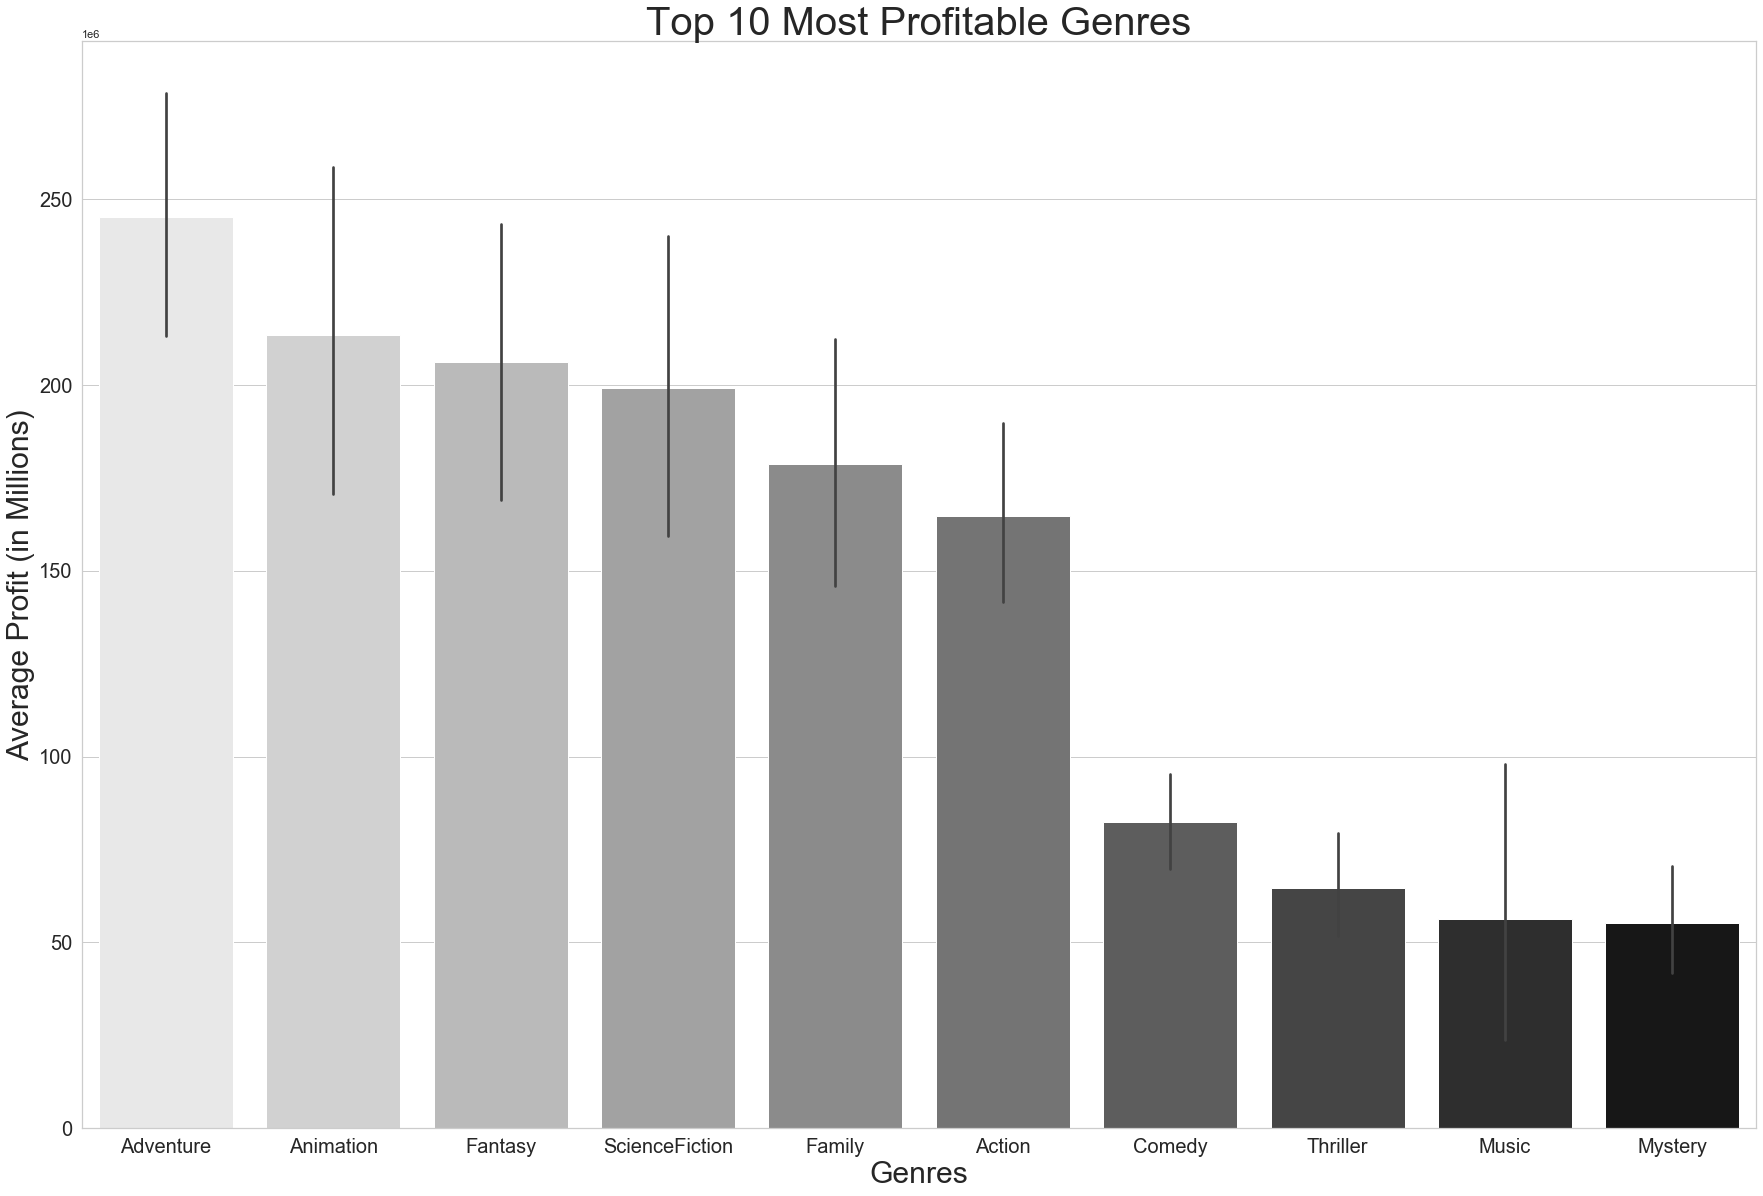

In [212]:
#Plotting average profit for the top 10 most profitable genres. 
#Ordering by the mean

sns.set_style("whitegrid")


f, ax = plt.subplots(figsize=(30, 20))
sns.set(font="Helvetica")
sns.barplot(x="Genres", y="total_profit", data=top_ten_df,palette='gray_r',order=list(genre_avg_profit.head(10)['Genres']));
plt.ylabel('Average Profit (in Millions)',fontsize=30)
plt.title('Top 10 Most Profitable Genres',fontsize=40)
plt.xlabel('Genres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()

In [222]:
#plotting distirbution of top 3 genres

top_three_df = Explode_genres[(Explode_genres['Genres'] == 'Adventure') | 
               (Explode_genres['Genres'] == 'Animation') | 
               (Explode_genres['Genres'] == 'Fantasy')]

top_three_df.sort_values('total_profit',ascending = False,inplace=True)
top_three_df.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,Adventure,['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Adventure,['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Fantasy,['PG-13']
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,2010,135397,Adventure,['PG-13']
26,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,2010,24428,Adventure,['PG-13']


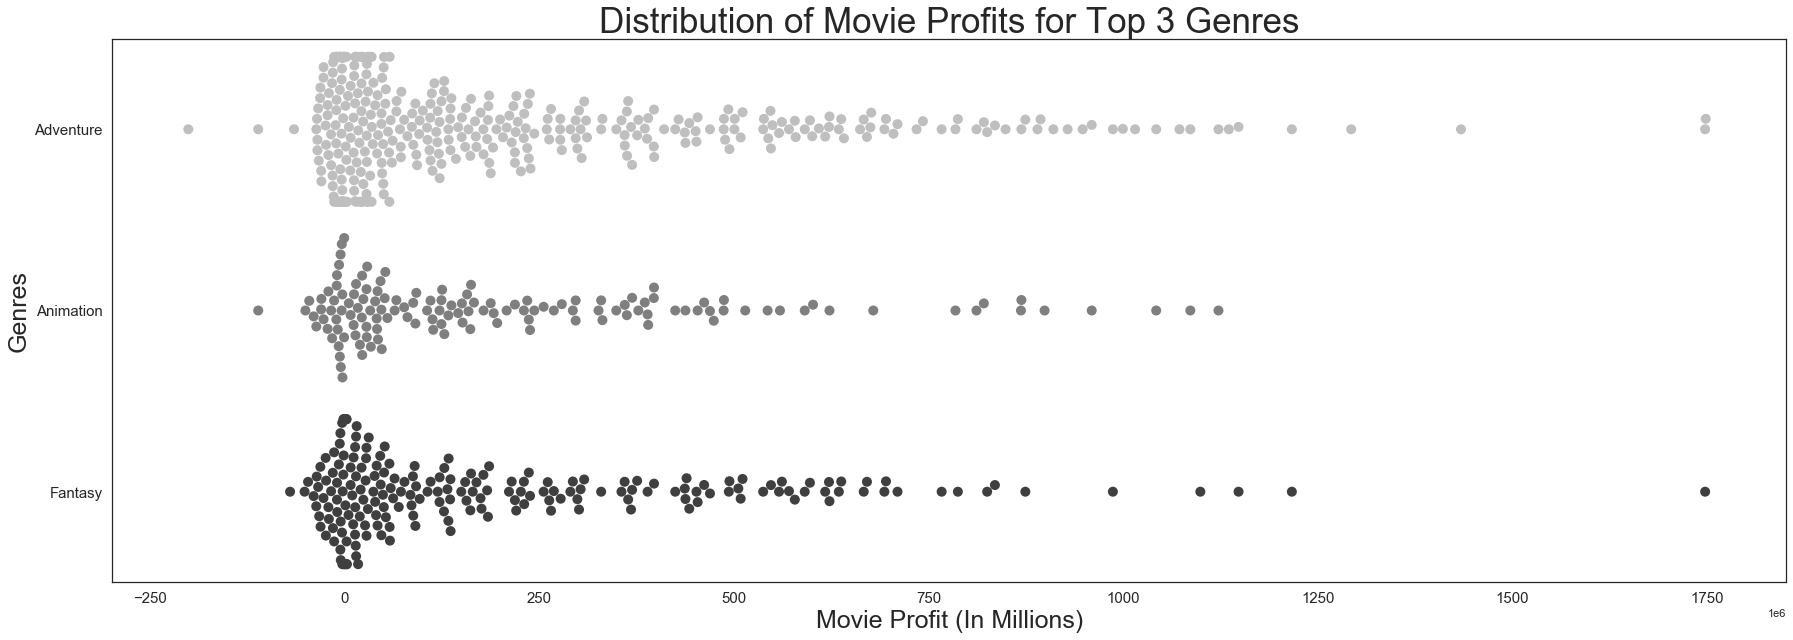

In [224]:
#plotting distribution of top 3 genres

sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.swarmplot(y='Genres',x='total_profit',data=top_three_df,orient='h',palette="gray_r",order=['Adventure','Animation','Fantasy'],size=10)
sns.set(font="Helvetica")
plt.ylabel('Genres',fontsize=25)
plt.title('Distribution of Movie Profits for Top 3 Genres',fontsize=35)
plt.xlabel('Movie Profit (In Millions)',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()

# Question 3: Which Ratings are most profitable?

In [214]:
Explode_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Adventure,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Action,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Fantasy,['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,ScienceFiction,['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,Action,['PG-13']


In [218]:
#Grouped ratings

ratings_avg_profit = pd.DataFrame((Explode_genres.groupby('Ratings')['total_profit'].mean()/1000000).round(2)).sort_values('total_profit',ascending=False)
ratings_avg_profit.reset_index(inplace=True)


ratings_avg_profit.head(10)

,Ratings,total_profit
0,['PG'],186.27
1,['PG-13'],156.29
2,['G'],145.60
3,['R'],44.20
4,['NC-17'],16.41
5,['NR'],-0.64


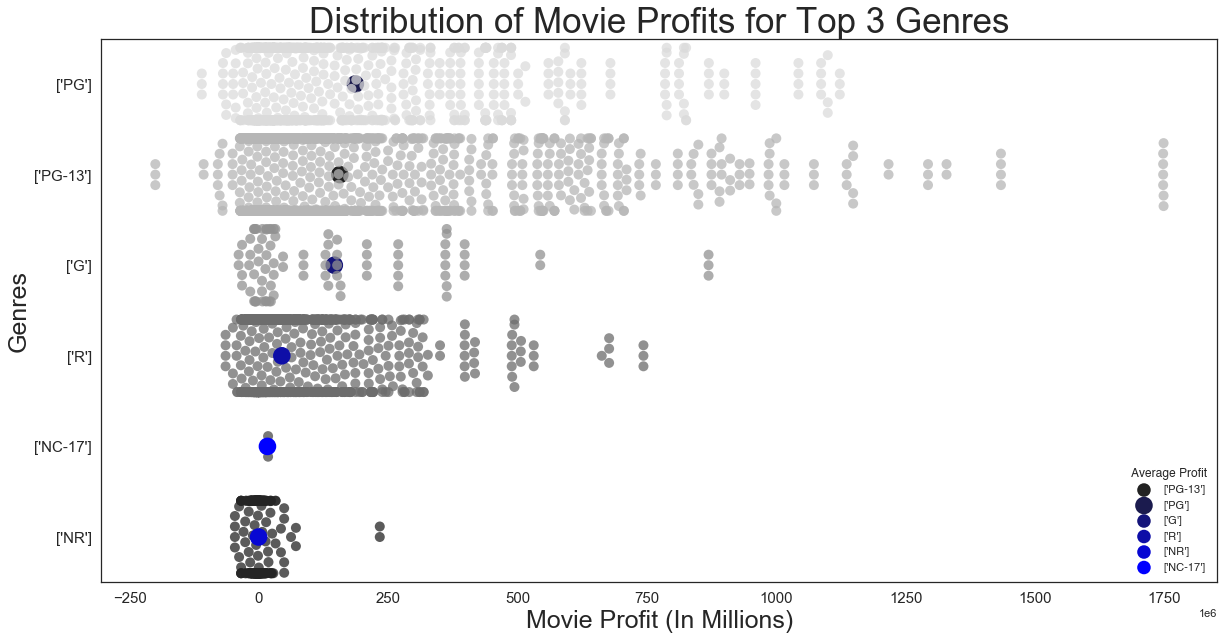

In [267]:
#plotting distribution of ratings

sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 10))
mean = sns.pointplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',linestyles = 'None', scale=2, 
                     ci=None,color='blue',markers = 'o',hue='Ratings',
                     order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],label='mean')
distro = sns.swarmplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',palette="gray_r",size=10,
                       alpha=0.75,order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"])
sns.set(font="Helvetica")
plt.legend(title='Average Profit',loc=4)
plt.ylabel('Genres',fontsize=25)
plt.title('Distribution of Movie Profits for Top 3 Genres',fontsize=35)
plt.xlabel('Movie Profit (In Millions)',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()

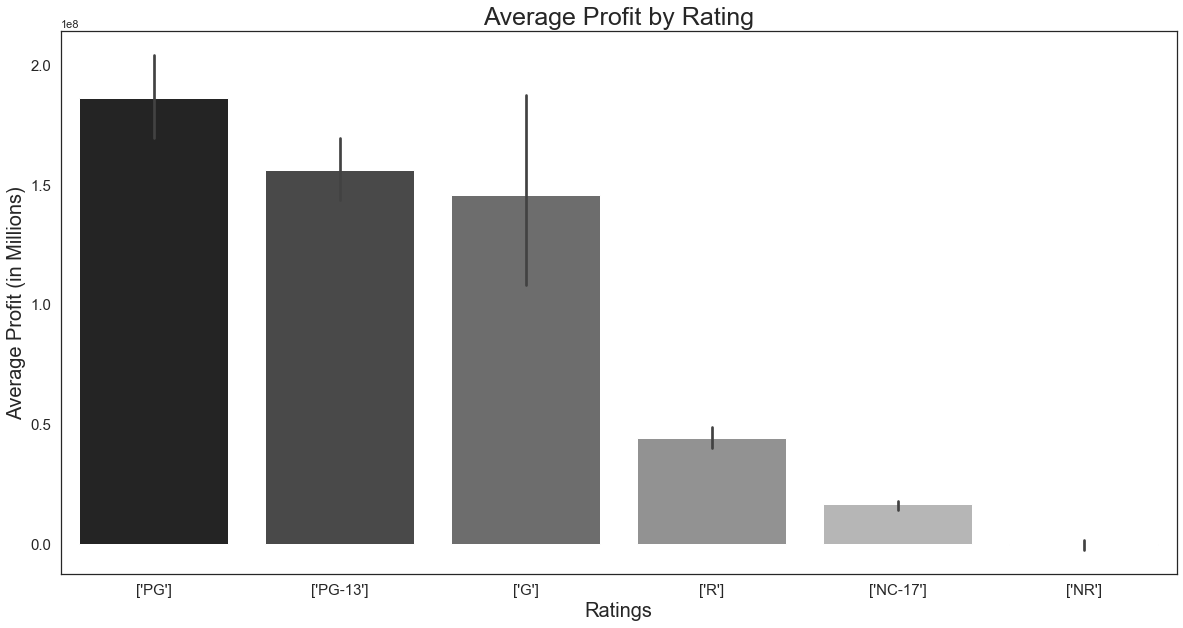

In [219]:
#plotting average of ratings

sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ratings", y="total_profit",data=Explode_genres,palette='gray',order=list(ratings_avg_profit['Ratings']));
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Profit by Rating',fontsize=25)
plt.xlabel('Ratings',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

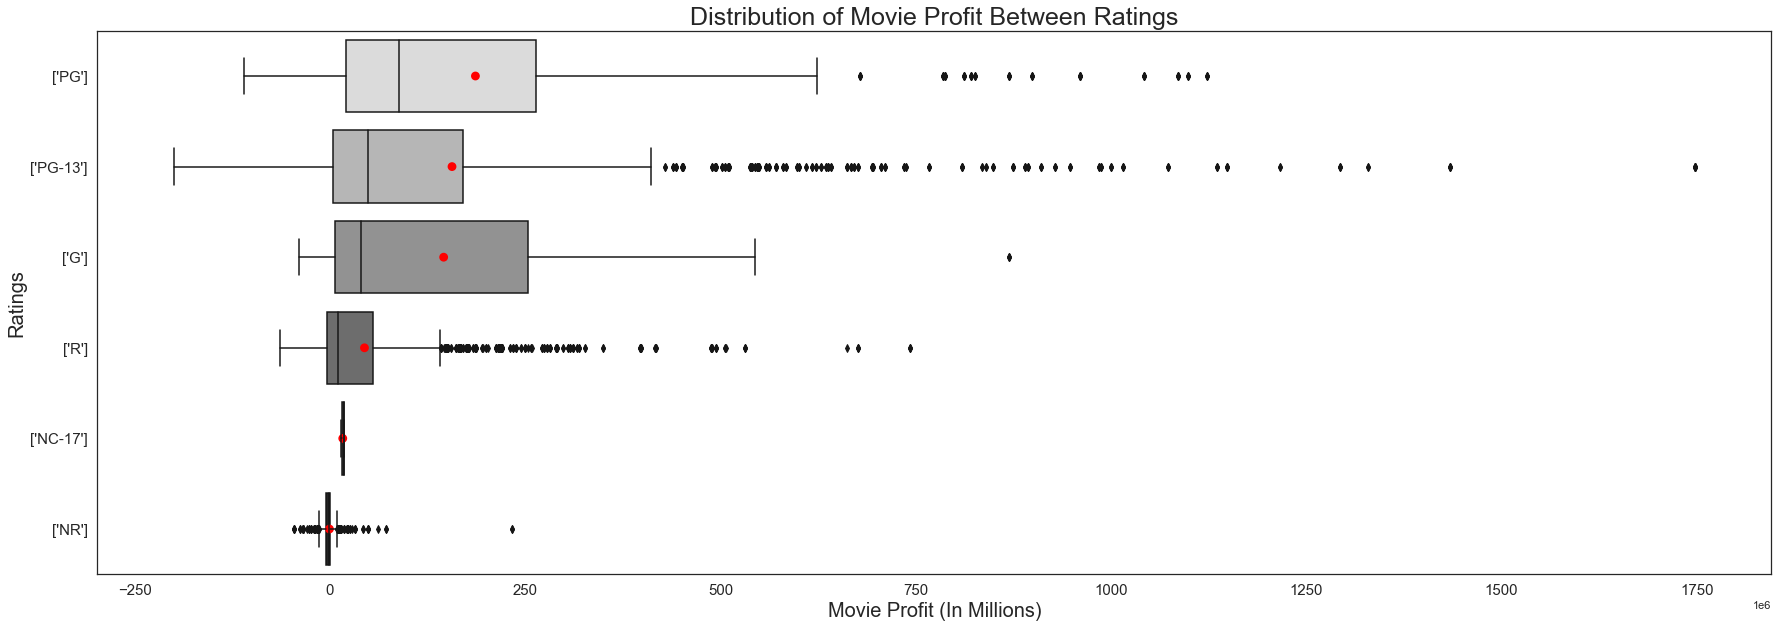

In [248]:
#plotting distribution of ratings. Boxplot is more detailed than we need.

sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',palette="gray_r",order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"])
sns.pointplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',linestyles = 'None', scale=1, ci=None,color='red',markers = 'o',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],label='mean')
sns.set(font="Helvetica")
plt.ylabel('Ratings',fontsize=20)
plt.title('Distribution of Movie Profit Between Ratings',fontsize=25)
plt.xlabel('Movie Profit (In Millions)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()


# Question 4: Which Ratings and Genres Combinations are Most Profitable?

In [273]:
#Creating a df for each of the top genres

Adventure_df = (Explode_genres[Explode_genres['Genres']=='Adventure'])
Animation_df = (Explode_genres[Explode_genres['Genres']=='Animation'])
Fantasy_df = (Explode_genres[Explode_genres['Genres']=='Fantasy'])

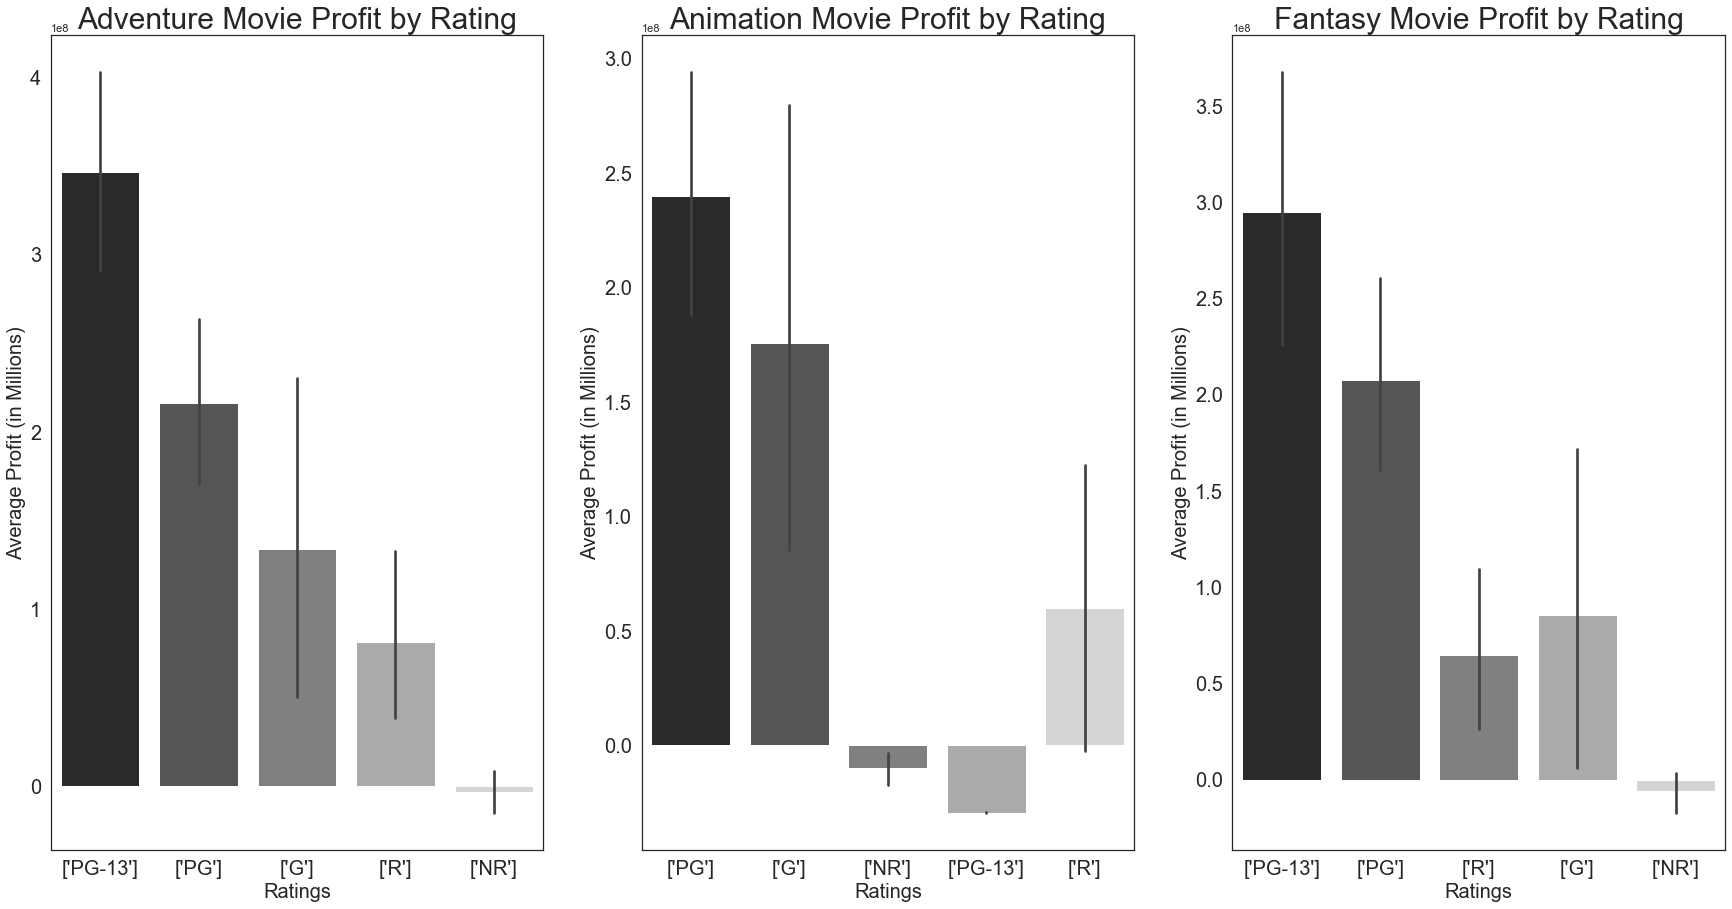

In [277]:
#Plotting Average Movie Profits by Rating

sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(30, 15))

#Adventure subplot

sns.barplot(x='Ratings', y='total_profit',data=Adventure_df,palette='gray',ax=ax1)
ax1.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax1.set_xlabel('Ratings',fontsize=20)
ax1.set_title('Adventure Movie Profit by Rating',fontsize=30)
ax1.tick_params(labelsize=20)

# #Animation subplot

sns.barplot(x='Ratings', y='total_profit',data=Animation_df,palette='gray',ax=ax2)
ax2.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax2.set_xlabel('Ratings',fontsize=20)
ax2.set_title('Animation Movie Profit by Rating',fontsize=30)
ax2.tick_params(labelsize=20)

# #Fantasy subplot

sns.barplot(x='Ratings', y='total_profit',data=Fantasy_df,palette='gray',ax=ax3)
ax3.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax3.set_xlabel('Ratings',fontsize=20)
ax3.set_title('Fantasy Movie Profit by Rating',fontsize=30)
ax3.tick_params(labelsize=20)


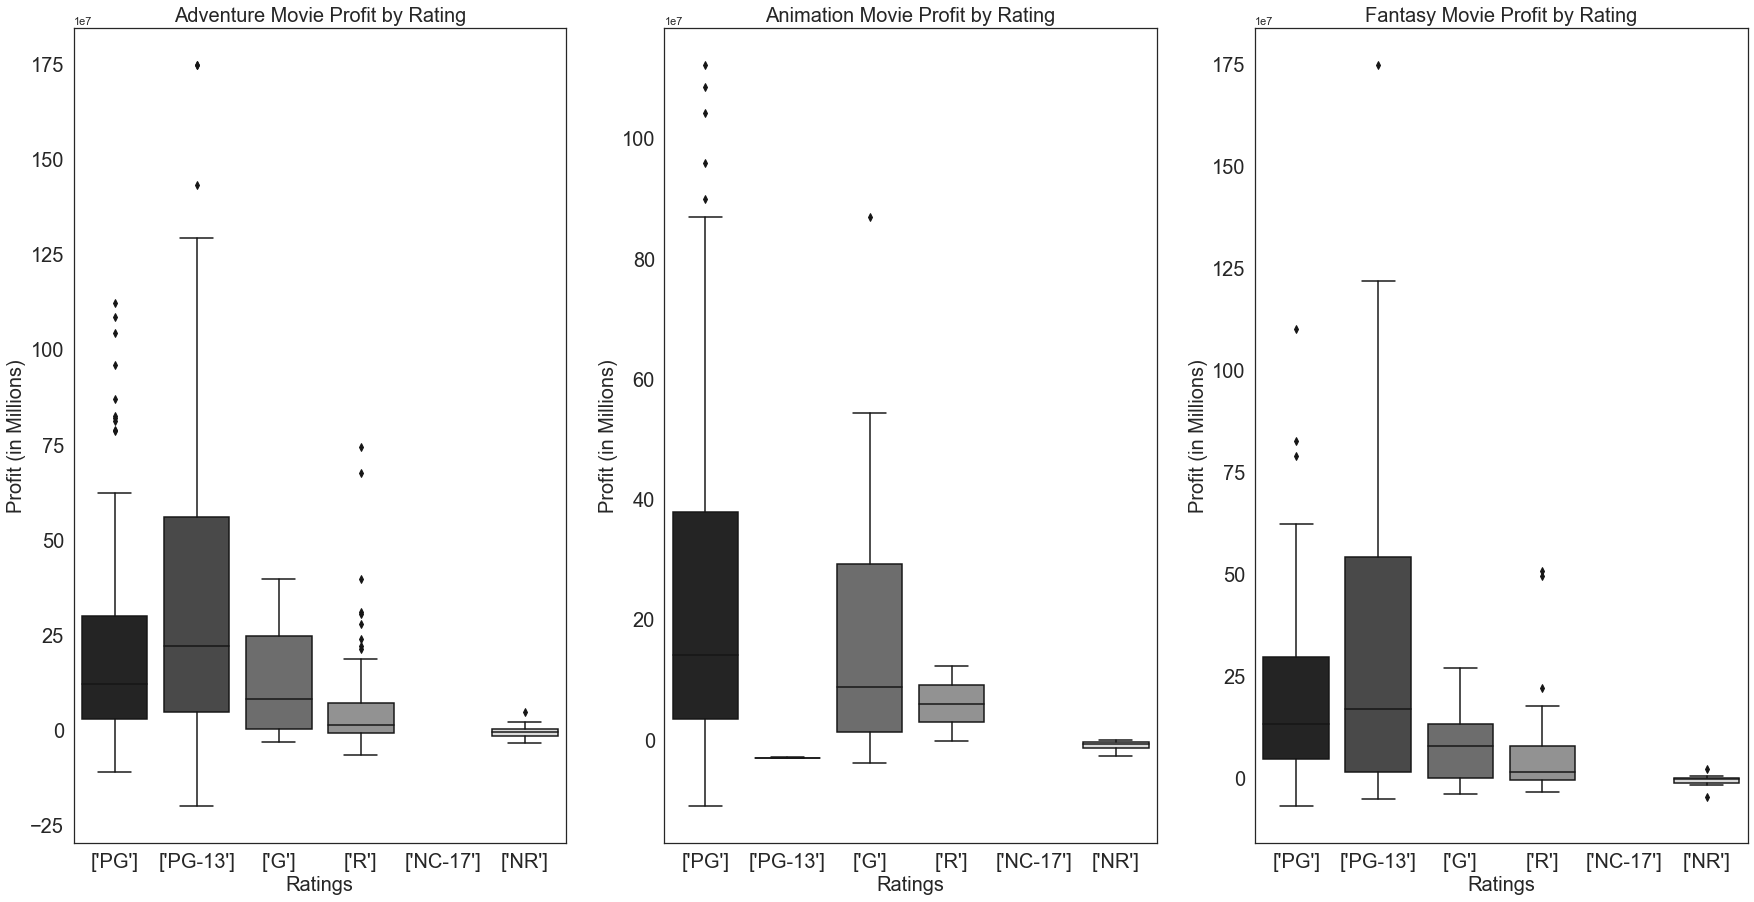

In [279]:
#Plotting boxplot to see distribution

sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(30, 15))


#Adventure subplot

sns.boxplot(x='Ratings', y='total_profit',data=Adventure_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax1)
ax1.set_ylabel('Profit (in Millions)',fontsize=20)
ax1.set_xlabel('Ratings',fontsize=20)
ax1.set_title('Adventure Movie Profit by Rating',fontsize=20)
ax1.tick_params(labelsize=20)
ax1.ticklabel_format(style='sci',scilimits = (7,7), axis='y')

#Animation subplot

sns.boxplot(x='Ratings', y='total_profit',data=Animation_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax2)
ax2.set_ylabel('Profit (in Millions)',fontsize=20)
ax2.set_xlabel('Ratings',fontsize=20)
ax2.set_title('Animation Movie Profit by Rating',fontsize=20)
ax2.tick_params(labelsize=20)
ax2.ticklabel_format(style='sci',scilimits = (7,7), axis='y')

#Fantasy subplot

sns.boxplot(x='Ratings', y='total_profit',data=Fantasy_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax3)
ax3.set_ylabel('Profit (in Millions)',fontsize=20)
ax3.set_xlabel('Ratings',fontsize=20)
ax3.set_title('Fantasy Movie Profit by Rating',fontsize=20)
ax3.tick_params(labelsize=20)
ax3.ticklabel_format(style='sci',scilimits = (7,7), axis='y')


# Recommendations

- Pursue production of Adventure, Animation and/or Fantasy films for freatest profits
- Keep ratings to PG-13 and below in order to maintain as large of a potential audience as possible
- Highest potential ratings/genre combinations:
 - Adventure & PG-13
 - Animation & PG
 - Fantasy & PG-13

